### 1. Import Required Libraries
    pandas (pd): Used for data manipulation and analysis.
    numpy (np): Supports numerical computations.
    matplotlib.pyplot (plt): Used for data visualization.
    seaborn (sns): Provides advanced statistical plotting.
    
    sklearn.preprocessing:
       LabelEncoder: Converts categorical values into numerical codes.
       StandardScaler: Standardizes numerical features (mean=0, std=1).
       MinMaxScaler: Scales numerical values to a fixed range (0 to 1).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

 ### 2. Load the Cleaned Dataset
    Reads the dataset from the specified file path and loads it into a pandas DataFrame (df).
    This step ensures we can analyze and manipulate the data in Python

In [ ]:
##Load Cleaned Data

df = pd.read_csv("../data/Customer Purchasing Behaviors.csv")  # Load preprocessed dataset
print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


### 3. Visualize Distribution of Key Variables
    df.hist(figsize=(12, 8), bins=30) <br>
    figsize means - Specifies the figure size of the entire plot (12 inches wide, 8 inches tall).<br>
    bins - Defines the number of bins (intervals) for each histogram.<br>

What does a histogram depict?<br>
    -Plots a histogram for each numeric column in df.<br>
    -Helps visualize the distribution of values.<br>
    -Useful for detecting skewness, outliers, and patterns in data.<br>

Insights You Can Gain:<br>
✅ Skewness – Is the data normally distributed or skewed?<br>
✅ Outliers – Are there extreme values?<br>
✅ Range & Spread – What are the min and max values?<br>
✅ Density of Values – Where do most values lie?<br>

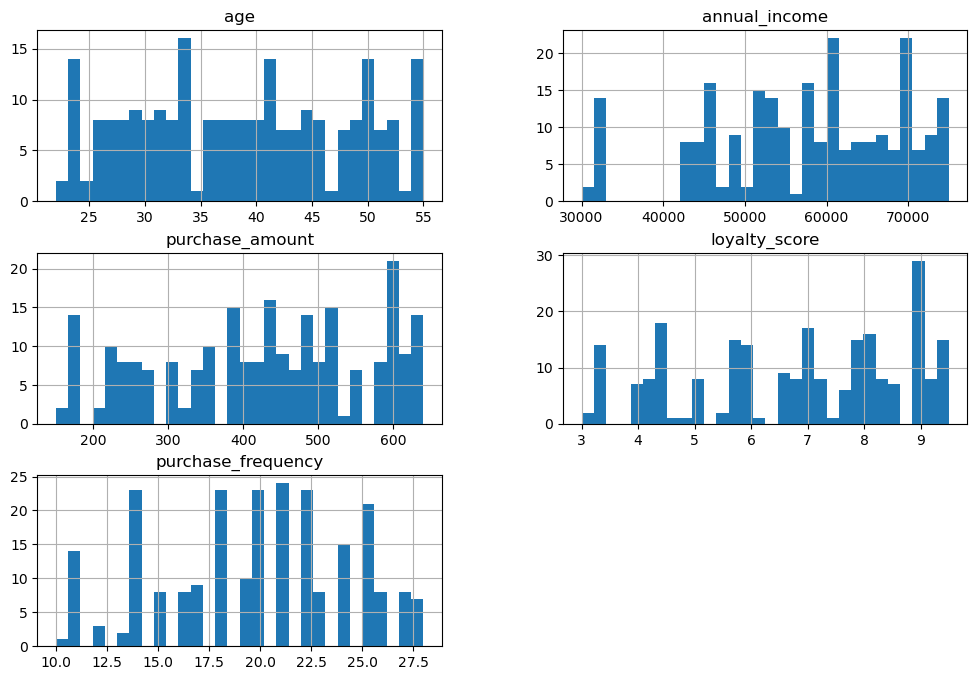

In [18]:
#1. Visualize Distribution of Key Variables 

#df.hist(figsize=(12, 8), bins=30)
#plt.show()

df.drop(columns=["user_id"]).hist(figsize=(12, 8), bins=30)
plt.show()



### 4. Loyalty Score Distribution
sns.countplot(x=df["loyalty_score"], palette="coolwarm")<br>
The command sns.countplot(x=df["loyalty_score"], palette="coolwarm") is used to create a count plot (bar chart) that visualizes the frequency of each unique value in the loyalty_score column.<br>

### Breaking it Down:<br>
> sns.countplot(...)<br>

Creates a bar chart showing the count of unique values in a categorical or discrete numerical column.
Each bar represents the number of occurrences of a specific loyalty_score value.<br>
> x=df["loyalty_score"]<br>

Specifies that the x-axis should display unique values of the loyalty_score column.
The y-axis will show the frequency of each unique loyalty_score.
> palette="coolwarm"<br>

Sets the color scheme for the bars using the "coolwarm" colormap (ranging from cool blues to warm reds).<br>

Insights You Can Gain:<br>
✅ Distribution of Loyalty Scores – Which scores are more common?<br>
✅ Outliers or Rare Values – Are certain scores much less frequent?<br>
✅ Customer Segmentation – Identify most common loyalty levels.<br>

C:\Users\samru\AppData\Local\Temp\ipykernel_7628\740434588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["loyalty_score"], palette="coolwarm")


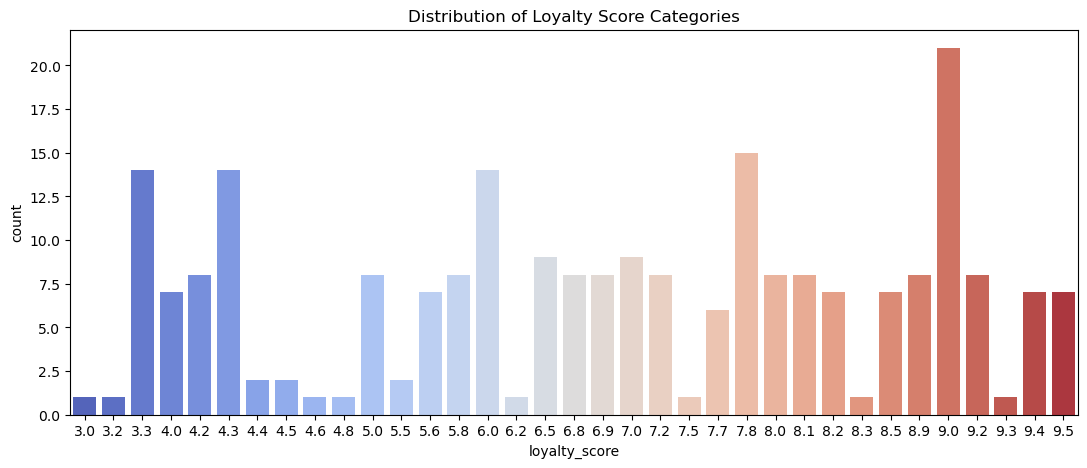

In [6]:
# Check Loyalty Score Distribution
plt.figure(figsize=(13,5))
sns.countplot(x=df["loyalty_score"], palette="coolwarm")
plt.title("Distribution of Loyalty Score Categories")
plt.show()

### 5. Detect Outliers Using Boxplots
sns.boxplot(data=df[["annual_income", "purchase_amount", "purchase_frequency"]])<br>
The command sns.boxplot(data=df[["annual_income", "purchase_amount", "purchase_frequency"]]) generates box plots for the specified numerical columns in the DataFrame.<br>

#### Breaking it Down:<br>
> sns.boxplot(...)<br>

Creates a box plot, which visually represents the distribution of numerical data and identifies outliers.<br>
>data=df[["annual_income", "purchase_amount", "purchase_frequency"]]<br>

Specifies the numerical columns for which box plots will be drawn.
Each column will have its own separate box plot.

#### Understanding the Box Plot Components:<br>
Box → Represents the interquartile range (IQR) (middle 50% of data).<br>
Line inside the box → Median (50th percentile).<br>
Whiskers → Extend to 1.5 × IQR beyond the quartiles (not outliers).<br>
Dots beyond whiskers → Outliers (extreme values).<br>

#### Insights You Can Derive:
✅ Identify Outliers → Are there extremely high or low values?
✅ Compare Distributions → Do purchase_amount and purchase_frequency have similar spreads?
✅ Detect Skewness → If the median is not centered, the data may be skewed.
✅ Check Variability → A wider box means more variability in the data.

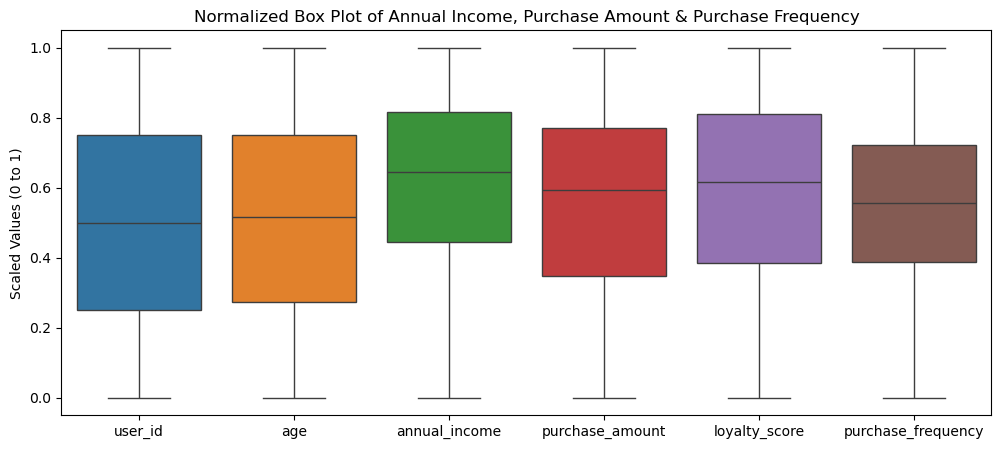

In [ ]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

# Plot boxplots
plt.figure(figsize=(12,5))
sns.boxplot(data=df_scaled)
plt.title("Normalized Box Plot of Annual Income, Purchase Amount & Purchase Frequency")
plt.ylabel("Scaled Values (0 to 1)")

#plt.xticks(ticks=[0,1,2], labels=['Annual Income', 'Purchase Amount', 'Purchase Frequency'])
plt.show()

### 6. Correlation Analysis
    6.1 Compute Correlation Matrix
    
    Computes correlation between numerical features.
    Identifies linear relationships between variables.

df.corr(numeric_only=True) calculates the correlation coefficients between all numerical columns in the dataset.

The correlation coefficient measures the strength and direction of the linear relationship between two variables.

In [9]:
#Correlation Analysis
#1. Compute Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                     user_id       age  annual_income  purchase_amount  \
user_id             1.000000  0.067061       0.059031         0.080621   
age                 0.067061  1.000000       0.974833         0.986140   
annual_income       0.059031  0.974833       1.000000         0.984208   
purchase_amount     0.080621  0.986140       0.984208         1.000000   
loyalty_score       0.060819  0.981835       0.984351         0.994147   
purchase_frequency  0.070541  0.980532       0.982920         0.993579   

                    loyalty_score  purchase_frequency  
user_id                  0.060819            0.070541  
age                      0.981835            0.980532  
annual_income            0.984351            0.982920  
purchase_amount          0.994147            0.993579  
loyalty_score            1.000000            0.986990  
purchase_frequency       0.986990            1.000000  


    6.2 Visualize Correlation Matrix (Heatmap)
    
sns.heatmap() is used to visualize the correlation matrix.<br>
annot=True ensures the correlation values are displayed inside each cell.<br>

cmap="coolwarm" applies a color gradient:<br>
 ✅ Dark red → Strong positive correlation (+1).<br>
 ✅ White → No correlation (0).<br>
 ✅ Dark blue → Strong negative correlation (-1).<br>

fmt=".2f" formats the values to two decimal places.<br>

    Why Use a Heatmap? 
✅ Easier to interpret relationships at a glance.<br>
✅ Helps identify highly correlated variables (multicollinearity risk).<br>
✅ Helps select important features for modeling.<br>
  

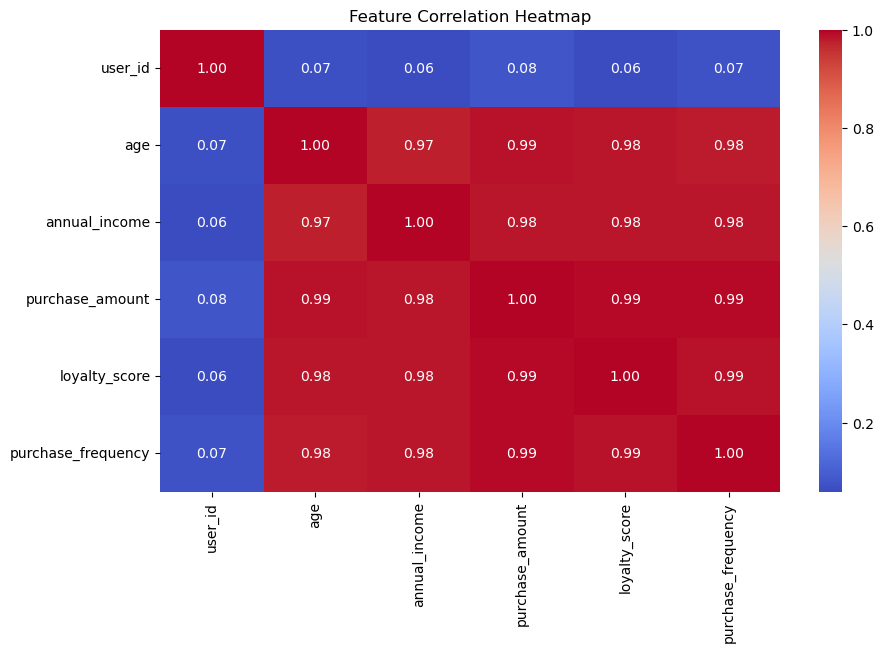

In [10]:
#Visualize Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### 7. Identify Strong Correlations with Loyalty Score
    Filters features with correlation above 0.3 (or below -0.3).
    
✅abs() ensures we capture both positive and negative correlations.<br>
✅Extracts only correlations for the loyalty_score column.<br>

    Key Insights:
✅Helps select features for the predictive model.<br>
✅Avoids multicollinearity (removes redundant variables).<br>
✅Improves model performance by focusing on the most impactful variables.<br>

In [11]:
#Identify Strong Correlations
threshold = 0.3  # Set a threshold for strong correlations
strong_correlations = correlation_matrix[abs(correlation_matrix["loyalty_score"]) > threshold]["loyalty_score"]
print(strong_correlations)

age                   0.981835
annual_income         0.984351
purchase_amount       0.994147
loyalty_score         1.000000
purchase_frequency    0.986990
Name: loyalty_score, dtype: float64


### 8. Pairplot for Feature Relationships
✅ Creates scatter plots for every combination of selected numerical features.<br>
✅ hue="loyalty_score" colors points based on loyalty score categories.<br>
✅ Used to detect trends, clusters, and non-linear relationships..<br>
    
    Key Insights:
✅ Identifies patterns and groupings within the data.<br>
✅ Detects linear or non-linear relationships between features.<br>
✅ Shows overlapping vs. distinct classes → useful for classification problems.<br>


Since loyalty_score is numeric (continuous) and because hue works better with categorical data we convert loyalty_score into bins/categories before plotting.


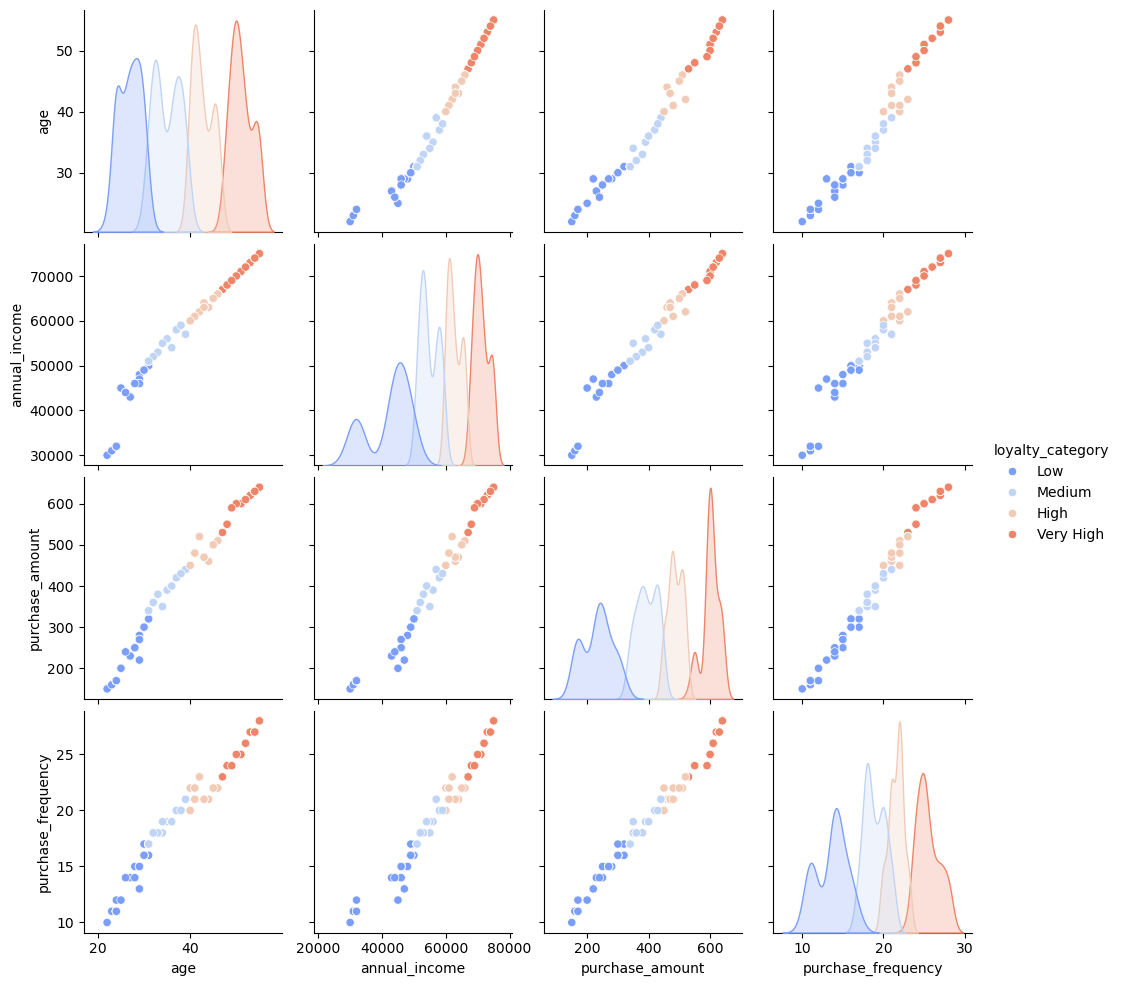

In [17]:
#Pairplot for Feature Relationships
df["loyalty_category"] = pd.qcut(df["loyalty_score"], q=4, labels=["Low", "Medium", "High", "Very High"])
sns.pairplot(df[["loyalty_category", "age", "annual_income", "purchase_amount", "purchase_frequency"]], 
             hue="loyalty_category", 
             palette="coolwarm")
plt.show()

 ## Conclusion of Correlation Analysis <br>
 
1️⃣Strong Positive Correlation Between loyalty_score and purchase_amount (0.994) 
- Customers who spend more tend to have a higher loyalty score.<br>
- Suggests that high-spending customers are more loyal.<br>

2️⃣High Correlation Between loyalty_score and annual_income (0.984)

- Higher-income customers generally have higher loyalty scores.<br>
- This could indicate that financially stable customers tend to engage more with the brand.<br>

3️⃣age is highly correlated with annual_income (0.974) and purchase_amount (0.986)

 - Older customers tend to have higher incomes and make more significant purchases.<br>
 
4️⃣purchase_frequency has a strong correlation with loyalty_score (0.987)

- Frequent buyers are more likely to have a higher loyalty score.
- Encouraging frequent purchases (e.g., via loyalty programs) may improve customer retention.
 

## Final Insights
✅Loyalty is heavily influenced by purchase_amount, annual_income, and purchase_frequency.<br>
✅Age plays a role indirectly—older customers tend to earn more and spend more.<br>
✅To increase loyalty, businesses could target high-income, high-spending customers with personalized rewards.<br>